# INTRODUCION
This my first Notebook in DL course ... I will practice on ANN Architecture 


- Design my own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as my training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


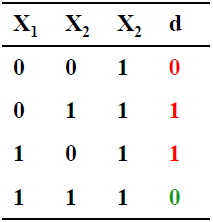

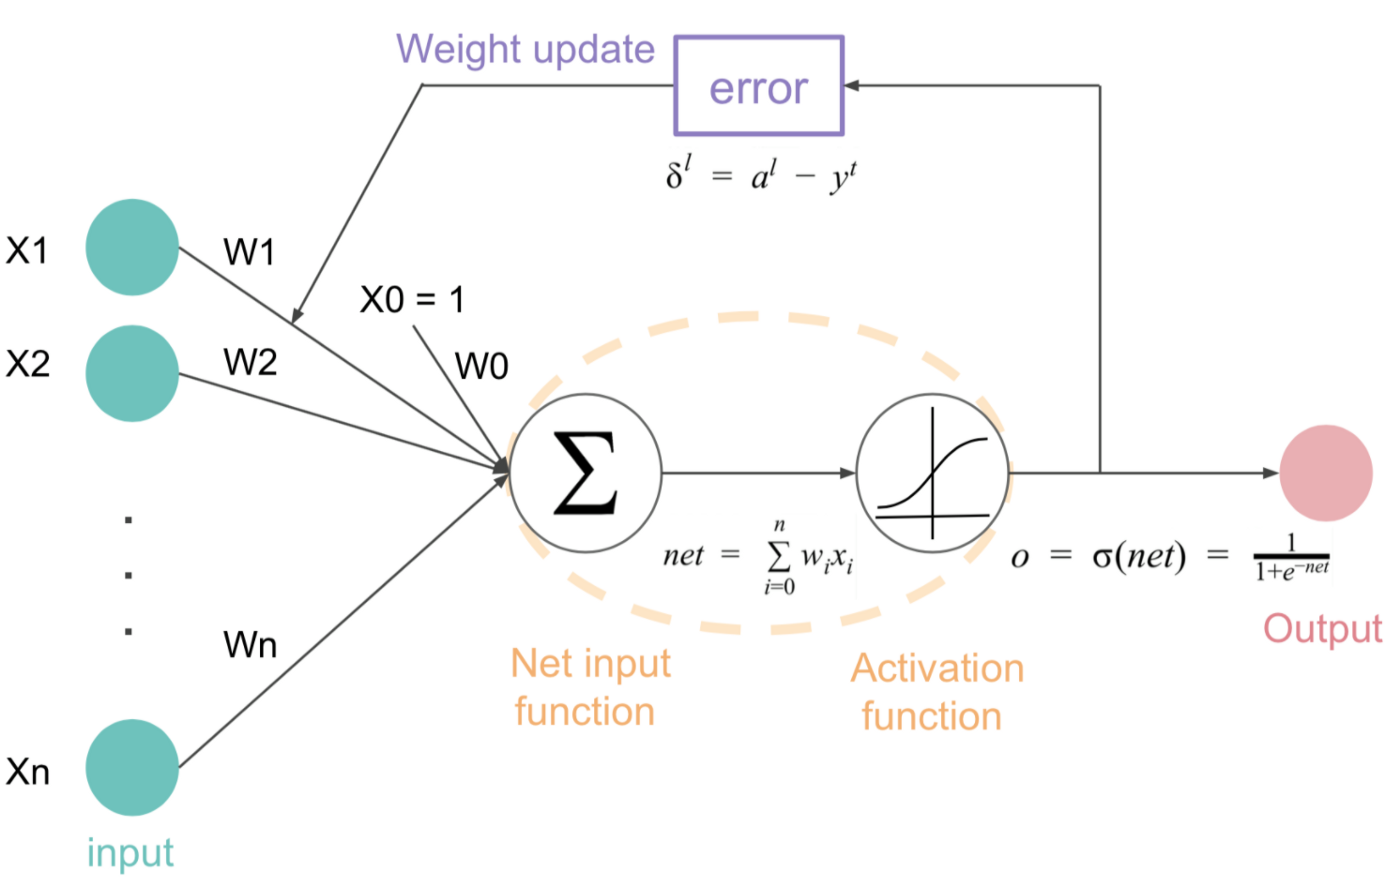

## `i` Implementation

In [1]:
import numpy as np



In [2]:
class ANN:
    np.random.seed = 42
    def __init__(self, X, y):
        self.X=X
        self.y=y
        self.y_pred=np.zeros_like(y)
        self.weights=np.random.rand(X.shape[1],1)

    def sigmoid(self, z):
        s =1 / (1 + np.exp(-z))
        return s 


    def sigmoid_derivative(self, p):
        s_derivative= p * (1 - p)
        return s_derivative
        

    def feedforward(self):
        self.y_pred = self.sigmoid(np.dot(self.X, self.weights))
        

    def backprop(self):
        error = self.y - self.y_pred
        adjustment = error * self.sigmoid_derivative(self.y_pred)
        self.weights += np.dot(self.X.T, adjustment)
        

    def fit(self, iterations, verbose=1):
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose and i % (iterations // 10) == 0:
                loss = np.mean(np.square(self.y - self.y_pred))
                print(f"Iteration {i}: Loss = {loss}")


## `ii` Testing

In [3]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [4]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Iteration 0: Loss = 0.26703476045076535
Iteration 100: Loss = 0.00878855077903496
Iteration 200: Loss = 0.003996232394349636
Iteration 300: Loss = 0.002547658179649141
Iteration 400: Loss = 0.0018596406832428157
Iteration 500: Loss = 0.00146026520444981
Iteration 600: Loss = 0.00120022983834039
Iteration 700: Loss = 0.0010177955730279018
Iteration 800: Loss = 0.0008829052339930772
Iteration 900: Loss = 0.0007792065832016759


In [5]:
model = ANN(X, y)
model.fit(iterations=1000, verbose=1)

Iteration 0: Loss = 0.21011575592394288
Iteration 100: Loss = 0.008576979302655288
Iteration 200: Loss = 0.003948822195772594
Iteration 300: Loss = 0.002527717498052705
Iteration 400: Loss = 0.0018488021775715814
Iteration 500: Loss = 0.0014534922760374189
Iteration 600: Loss = 0.0011956095658703226
Iteration 700: Loss = 0.0010144481576743634
Iteration 800: Loss = 0.0008803711925538128
Iteration 900: Loss = 0.0007772231095430689


----

- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

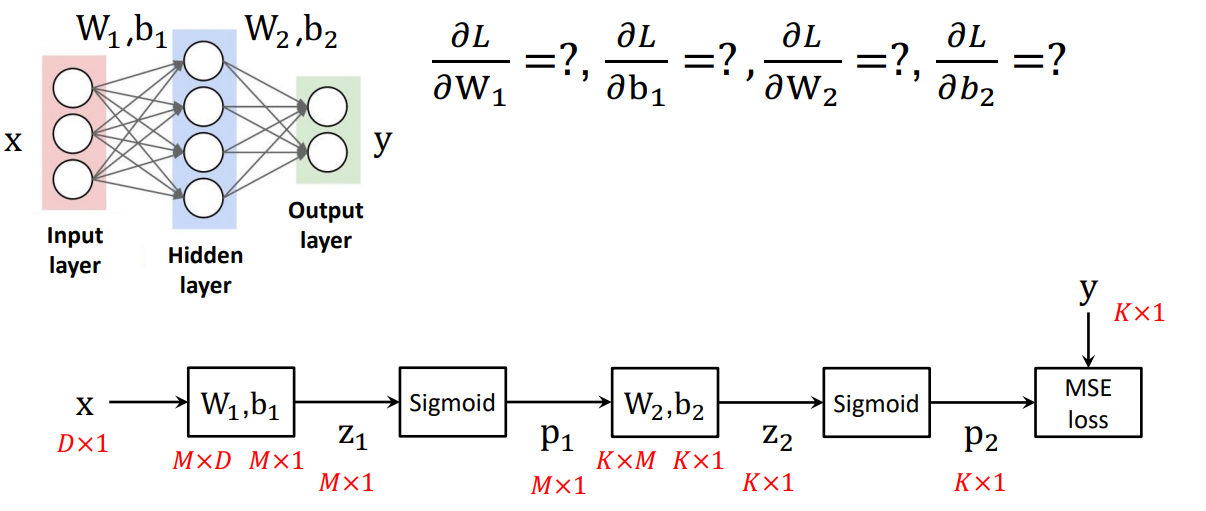

## `i` Implementation

In [6]:
class ANN:
    np.random.seed = 42
    def __init__(self, X, y, num_hidden_nodes):
        self.X = X
        self.y = y
        self.num_hidden_nodes =num_hidden_nodes
        self.input_nodes = X.shape[1]
        self.output_nodes = y.shape[1]
        self.weights_input_hidden = np.random.rand(self.input_nodes, self.num_hidden_nodes)
        self.weights_hidden_output = np.random.rand(self.num_hidden_nodes, self.output_nodes)

    def sigmoid(self, z):
        s =1 / (1 + np.exp(-z))
        return s 


    def sigmoid_derivative(self, p):
        s_derivative= p * (1 - p)
        return s_derivative

    def feedforward(self):
        self.hidden_layer_output = self.sigmoid(np.dot(self.X, self.weights_input_hidden))
        self.output_layer_output = self.sigmoid(np.dot(self.hidden_layer_output, self.weights_hidden_output))


    def backprop(self):
        error_output = self.y - self.output_layer_output
        delta_output = error_output * self.sigmoid_derivative(self.output_layer_output)

        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(delta_output)
        self.weights_input_hidden += self.X.T.dot(delta_hidden)

    def fit(self, iterations, verbose=1):
       for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose and i % (iterations // 10) == 0:
                loss = np.mean(np.square(self.y - self.output_layer_output))
                print(f"Iteration {i}: Loss = {loss}")

## `ii` Testing

In [7]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [8]:
model = ANN(X, y, 8)
model.fit(iterations=1000, verbose=1)

Iteration 0: Loss = 0.43607358856041234
Iteration 100: Loss = 0.011343539549810447
Iteration 200: Loss = 0.0026894380020079244
Iteration 300: Loss = 0.0014070003677217732
Iteration 400: Loss = 0.0009289723119996164
Iteration 500: Loss = 0.0006851833866737144
Iteration 600: Loss = 0.0005390724214599756
Iteration 700: Loss = 0.000442397803464549
Iteration 800: Loss = 0.00037400513352378747
Iteration 900: Loss = 0.00032322524886316105


---


- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
np.random.seed = 42

In [10]:
dataset = pd.read_csv('diabetes.csv')
dataset.shape

(768, 9)

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [14]:
X.shape

(768, 8)

In [15]:
y.shape

(768,)

## `i` Shallow network


In [16]:
model=Sequential()
model.add(Dense(5,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [17]:
X.shape

(768, 8)

In [18]:
768/32

24.0

In [19]:
model.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150
24/24 [==============================] - 1s 977us/step - loss: 14.7052 - accuracy: 0.5117
Epoch 2/150
24/24 [==============================] - 0s 939us/step - loss: 3.0934 - accuracy: 0.5820
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 2.0929 - accuracy: 0.5846
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 1.5842 - accuracy: 0.5951
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 1.2125 - accuracy: 0.5846
Epoch 6/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0007 - accuracy: 0.6003
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0022 - accuracy: 0.6094
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.8113 - accuracy: 0.6484
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.7801 - accuracy: 0.6445
Epoch 10/150
24/24 [==============================] - 0s 1ms/step - loss: 0.7348 - accuracy: 0.6380
Epoc

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [22]:
model.evaluate(X,y)

24/24 [==============================] - 0s 827us/step - loss: 0.5388 - accuracy: 0.7461


[0.5387861728668213, 0.74609375]

In [23]:
print("Final Acurracy",history.history['accuracy'][-1])

Final Acurracy 0.7604166865348816


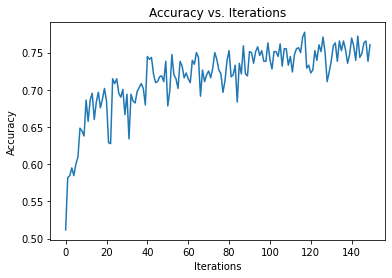

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

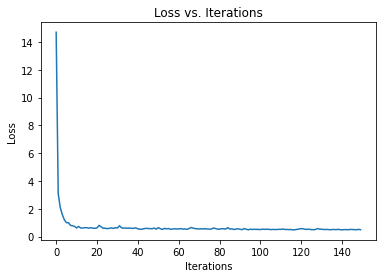

In [25]:
plt.plot(history.history['loss'])
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## `ii` Deep network


In [26]:
deep_model = Sequential()
deep_model.add(Dense(12, activation='relu', input_shape=(X.shape[1],)))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [27]:
deep_model.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history2 = deep_model.fit(X, y, epochs=300, batch_size=32)


Epoch 1/300
24/24 [==============================] - 0s 969us/step - loss: 1.9839 - accuracy: 0.5638
Epoch 2/300
24/24 [==============================] - 0s 1ms/step - loss: 0.8080 - accuracy: 0.6198
Epoch 3/300
24/24 [==============================] - 0s 960us/step - loss: 0.6551 - accuracy: 0.6562
Epoch 4/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6719
Epoch 5/300
24/24 [==============================] - 0s 975us/step - loss: 0.6294 - accuracy: 0.6654
Epoch 6/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6654
Epoch 7/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.6979
Epoch 8/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6032 - accuracy: 0.6875
Epoch 9/300
24/24 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.7083
Epoch 10/300
24/24 [==============================] - 0s 943us/step - loss: 0.5756 - accuracy: 0.7253
E

In [29]:
history2.history.keys()

dict_keys(['loss', 'accuracy'])

In [30]:
deep_model.evaluate(X,y)

24/24 [==============================] - 0s 892us/step - loss: 0.4489 - accuracy: 0.7904


[0.44893014430999756, 0.7903645634651184]

In [31]:
print("Final Acurracy",history2.history['accuracy'][-1])

Final Acurracy 0.7890625


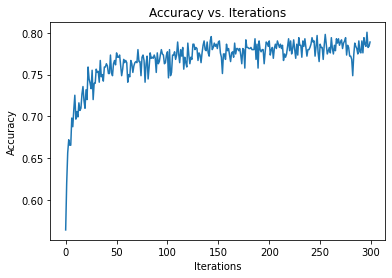

In [32]:
plt.plot(history2.history['accuracy'])
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

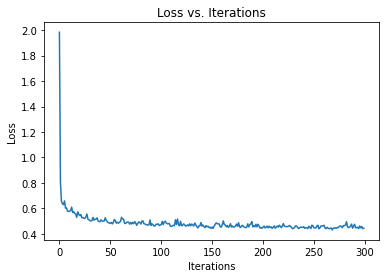

In [33]:
plt.plot(history2.history['loss'])
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## `iii` Deeper network


In [34]:
deeper_model = Sequential()
deeper_model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
deeper_model.add(Dense(16, activation='relu'))
deeper_model.add(Dense(8, activation='relu'))
deeper_model.add(Dense(1, activation='sigmoid'))
deeper_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [35]:
deeper_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history3 = deeper_model.fit(X, y, epochs=300, batch_size=32)

Epoch 1/300
24/24 [==============================] - 0s 1ms/step - loss: 6.5506 - accuracy: 0.6471
Epoch 2/300
24/24 [==============================] - 0s 1ms/step - loss: 1.3468 - accuracy: 0.5807
Epoch 3/300
24/24 [==============================] - 0s 1ms/step - loss: 0.8070 - accuracy: 0.5820
Epoch 4/300
24/24 [==============================] - 0s 1ms/step - loss: 0.7099 - accuracy: 0.6172
Epoch 5/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.6263
Epoch 6/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6367
Epoch 7/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6523
Epoch 8/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6576
Epoch 9/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.6641
Epoch 10/300
24/24 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6576
Epoch 11/

In [37]:
history3.history.keys()

dict_keys(['loss', 'accuracy'])

In [38]:
deeper_model.evaluate(X,y)

24/24 [==============================] - 0s 871us/step - loss: 0.3713 - accuracy: 0.8242


[0.37132692337036133, 0.82421875]

In [39]:
print("Final Acurracy",history3.history['accuracy'][-1])

Final Acurracy 0.81640625


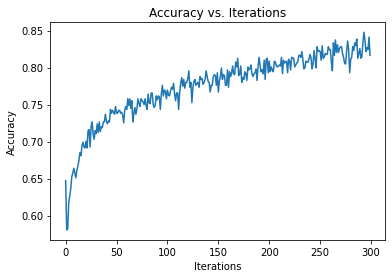

In [40]:
plt.plot(history3.history['accuracy'])
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

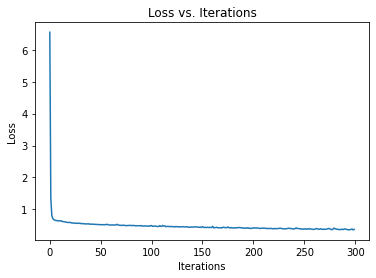

In [41]:
plt.plot(history3.history['loss'])
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$